In [179]:
from covidtrack.track import counties
from covidtrack.track import Location

In [180]:
import sys
sys.path.append("/Users/shreyas/Desktop/Web Dev/covidtrack")
from covidtrack.track import counties
from covidtrack.track import Location
import pandas as pd

main = pd.DataFrame(counties)
main['cases'] = main['cases'].astype(int)
main['deaths'] = main['deaths'].astype(int)

In [181]:
locations = Location.query.order_by(Location.id.desc()).first() #look at all the database contents in order of creation and returns all of them
example = locations.state
indexes = []
for i in range(0,len(counties)):
    if counties[i]['state'] != example:
        indexes.append(i)
main = main.drop(indexes, axis=0)


In [182]:
main.tail()

,date,county,state,fips,cases,deaths
59071,2020-04-14,Williamsburg city,Virginia,51830.0,20,1
59072,2020-04-14,Winchester city,Virginia,51840.0,20,0
59073,2020-04-14,Wise,Virginia,51195.0,14,1
59074,2020-04-14,Wythe,Virginia,51197.0,7,0
59075,2020-04-14,York,Virginia,51199.0,35,1


In [183]:
total = main.groupby(['date']).sum().loc[:,['cases','deaths']].reset_index()

In [184]:
import fbprophet
from fbprophet.plot import add_changepoints_to_plot

In [185]:
df_prophet= total.rename(columns={'date': 'ds', 'cases': 'y'})

m_global = fbprophet.Prophet(changepoint_prior_scale=0.05,changepoint_range=0.95,
                      daily_seasonality=False, 
                      weekly_seasonality=True,
                     mcmc_samples=300)
m_global.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m_global.fit(df_prophet)

future_global = m_global.make_future_dataframe(periods=30, freq='D')

forecast_global = m_global.predict(future_global)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


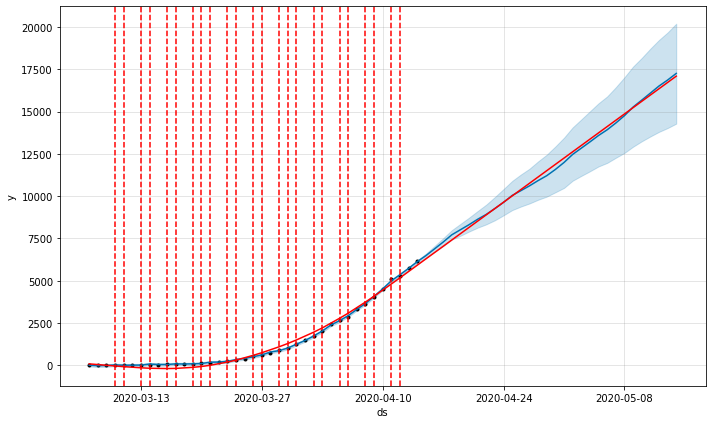

In [186]:
fig=m_global.plot(forecast_global)
a = add_changepoints_to_plot(fig.gca(), m_global, forecast_global)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.
